# Análisis exploratorio
---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df_minsait = pd.read_csv('data/Modelar_UH2020.txt', sep="|", index_col='ID', encoding='utf-8')
print("Tamaño del conjunto de datos:  %d" % df_minsait.shape[0])
print("Número de variables: %d" % df_minsait.shape[1])
if df_minsait.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
df_minsait.head()

Tamaño del conjunto de datos:  103230
Número de variables: 55
El índice es único.


,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
ID,,,,,,,,,,,,,,,,,,,,,
35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL


In [3]:
list_class_order = ['RESIDENTIAL', 'PUBLIC', 'RETAIL', 'OFFICE', 'INDUSTRIAL', 'AGRICULTURE', 'OTHER']

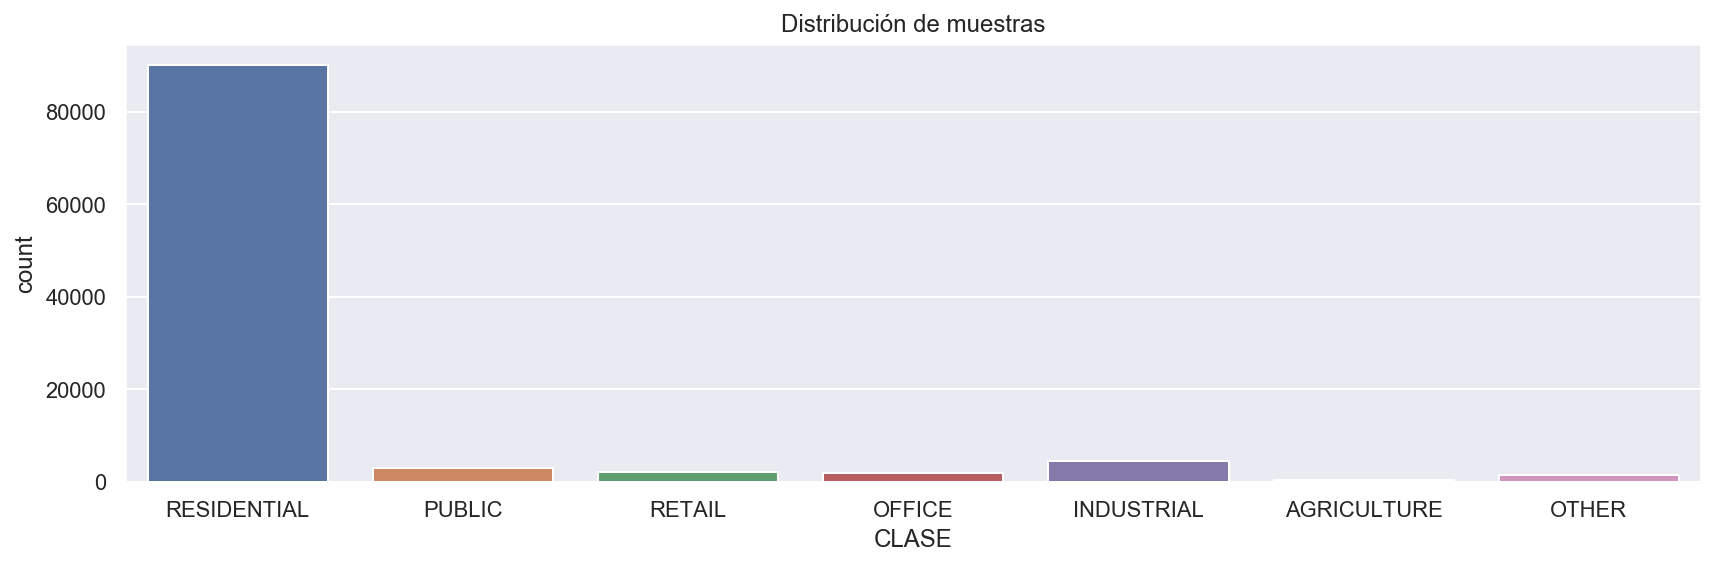

In [4]:
plt.figure(figsize=(12,4))
sns.countplot(x='CLASE', data=df_minsait, order=list_class_order)
plt.title('Distribución de muestras')
plt.tight_layout()
plt.show()

In [5]:
df_minsait.describe()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR
count,1.032300e+05,1.032300e+05,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103210.000000
mean,2.208858e+09,1.655955e+08,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,...,2328.363095,2738.622278,7748.293927,441.123610,0.563343,0.062482,0.061855,1.074327,1972.552436,3.766709
std,2.751723e+07,2.040199e+05,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,...,295.852549,365.812714,2795.775635,1869.705189,0.174141,0.042849,0.042295,0.541156,22.335987,2.944896
min,2.120751e+09,1.650957e+08,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,...,1861.006226,2172.992676,4085.049076,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000
25%,2.194235e+09,1.654515e+08,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,...,2126.002441,2478.998193,6051.309064,97.477454,0.455183,0.038255,0.038153,0.801352,1960.000000,1.000000
50%,2.205985e+09,1.655907e+08,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,...,2313.999268,2688.000000,6798.207198,171.554907,0.536336,0.055802,0.055036,0.997175,1972.000000,4.000000
75%,2.224105e+09,1.657138e+08,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,...,2491.004199,2940.996704,8033.479864,343.563671,0.674723,0.078477,0.078064,1.223456,1989.000000,5.000000
max,2.287300e+09,1.665046e+08,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,...,3750.997559,4614.998535,15848.608811,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000


In [6]:
df_minsait.columns

Index(['X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3',
       'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8',
       'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2',
       'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7',
       'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
       'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6',
       'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0',
       'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4',
       'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8',
       'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3',
       'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR', 'CADASTRALQUALITYID',
       'CLASE'],
      dtype='object')

---
## Análisis exploratorio

Primeramente vamos a obtener información sobre la variable *CLASE*, que es la variable objetivo de nuestro problema:

In [7]:
df_minsait['CLASE'].value_counts()

RESIDENTIAL    90173
INDUSTRIAL      4490
PUBLIC          2976
RETAIL          2093
OFFICE          1828
OTHER           1332
AGRICULTURE      338
Name: CLASE, dtype: int64

Como podemos ver, nos encontramos con un conjunto de datos muy desbalanceado, ya que se presentan un gran número de registros pertencientes a la clase de *RESIDENTIAL*. Por ello, vamos a realizar un análsis exploratorio de los datos, ya que también contamos con un amplio número de características.

Para ello, lo primero que haremos es realizar una división de las características en función de su tipo:

In [8]:
dis_df_columns = df_minsait.select_dtypes(exclude=np.number).columns.tolist()
#dis_df_columns.remove('CLASE') #Eliminamos la variable clase
number_df_columns = df_minsait.select_dtypes(include=np.number).columns.tolist()

print('Discretas: ',dis_df_columns)
print('\nNuméricas: ',number_df_columns)

Discretas:  ['CADASTRALQUALITYID', 'CLASE']

Numéricas:  ['X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1', 'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR']


Como se puede observar, de primeras unicamente contamos con dos variables discretas (incluyendo la variable objetivo) mientras que el resto se tratan de variables numéricas. Vamos a realizar un anális en profunidad para cada uno de estos dos tipos:

## <font color="#004D7F">Tratamiento de las columnas numéricas </font>

El tratamiento de las columnas numéricas es relativamente sencillo, y se puede descomponer en varias etapas:

* Comprobar que, efectivamente, corresponden a características numéricas. 
* Detección y tratamiento de outliers. 
* Detección y tratemiento de valores perdidos. 
* Exploración de las variables. 

In [9]:
num_df_values = [(col, len(df_minsait[col].value_counts())) for col in number_df_columns]
num_df_values

[('X', 103132),
 ('Y', 93969),
 ('Q_R_4_0_0', 141),
 ('Q_R_4_0_1', 230),
 ('Q_R_4_0_2', 230),
 ('Q_R_4_0_3', 230),
 ('Q_R_4_0_4', 230),
 ('Q_R_4_0_5', 230),
 ('Q_R_4_0_6', 229),
 ('Q_R_4_0_7', 230),
 ('Q_R_4_0_8', 230),
 ('Q_R_4_0_9', 230),
 ('Q_R_4_1_0', 229),
 ('Q_G_3_0_0', 172),
 ('Q_G_3_0_1', 230),
 ('Q_G_3_0_2', 229),
 ('Q_G_3_0_3', 230),
 ('Q_G_3_0_4', 229),
 ('Q_G_3_0_5', 230),
 ('Q_G_3_0_6', 230),
 ('Q_G_3_0_7', 230),
 ('Q_G_3_0_8', 230),
 ('Q_G_3_0_9', 230),
 ('Q_G_3_1_0', 228),
 ('Q_B_2_0_0', 211),
 ('Q_B_2_0_1', 229),
 ('Q_B_2_0_2', 226),
 ('Q_B_2_0_3', 227),
 ('Q_B_2_0_4', 227),
 ('Q_B_2_0_5', 227),
 ('Q_B_2_0_6', 227),
 ('Q_B_2_0_7', 228),
 ('Q_B_2_0_8', 230),
 ('Q_B_2_0_9', 229),
 ('Q_B_2_1_0', 228),
 ('Q_NIR_8_0_0', 207),
 ('Q_NIR_8_0_1', 230),
 ('Q_NIR_8_0_2', 230),
 ('Q_NIR_8_0_3', 230),
 ('Q_NIR_8_0_4', 230),
 ('Q_NIR_8_0_5', 230),
 ('Q_NIR_8_0_6', 229),
 ('Q_NIR_8_0_7', 230),
 ('Q_NIR_8_0_8', 230),
 ('Q_NIR_8_0_9', 230),
 ('Q_NIR_8_1_0', 228),
 ('AREA', 103226),
 ('G

Por lo que parece, todas las variables ellas son numéricas y no se debe de realizar ningun cambio para ellas

### <font color="#004D7F"> Outliers </font>

Para la visualización e interpretación de outliers, vamos a clasificar las variables numéricas en tres grupos, que son los siguientes:

- **Colores:** 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1', 'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0'
- **Geométricas:** 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4'
- **Otras:** 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR'

In [10]:
colors = ['Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3', 'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7',
          'Q_R_4_0_8', 'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2', 'Q_G_3_0_3', 'Q_G_3_0_4',
          'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7', 'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
          'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6', 'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9',
          'Q_B_2_1_0', 'Q_NIR_8_0_0', 'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4', 'Q_NIR_8_0_5', 
          'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8', 'Q_NIR_8_0_9', 'Q_NIR_8_1_0']
geom = ['AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4']
others = ['CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR']
# Mirar donde incluir X e Y

##### <font color="#004D7F"> Variable Colores </font>

In [11]:
df_minsait[colors].describe()

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,...,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0
count,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000
mean,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,1455.156651,1790.156782,...,814.276061,1102.612169,1315.749309,1499.915698,1676.426383,1860.014128,2066.630198,2328.363095,2738.622278,7748.293927
std,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,234.809582,269.389796,...,228.324271,234.721672,234.891233,235.476530,239.760730,248.165718,264.334062,295.852549,365.812714,2795.775635
min,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,459.001373,591.000671,...,328.703671,700.003967,914.001007,1099.995972,1264.005249,1435.997559,1632.993774,1861.006226,2172.992676,4085.049076
25%,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,1378.988965,1691.304590,...,649.703033,952.999451,1151.004639,1336.003833,1513.998901,1692.994263,1878.997437,2126.002441,2478.998193,6051.309064
50%,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,1479.002441,1783.003601,...,782.505676,1088.002075,1328.011536,1525.002368,1700.000305,1873.000610,2067.002441,2313.999268,2688.000000,6798.207198
75%,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,1550.000244,1884.999426,...,935.499146,1222.998193,1436.998584,1628.998413,1808.002502,1978.989258,2194.001978,2491.004199,2940.996704,8033.479864
max,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,2575.792188,2940.000635,...,2055.998657,2324.008301,2579.501465,2801.996582,2983.994995,3158.000488,3408.002808,3750.997559,4614.998535,15848.608811


Como estudiar la correlación de todas y cada una de las variables relacionadas con el color es inviable y no se observarían correctamente los datos, lo que haremos es un agrupamiento por colores, es decir, tendremos lo siguiente:

- **Rojo**
- **Verde**
- **Azul**
- **NIR**

In [ ]:
# Correlacion del color rojo con todo el resto de variables, incluyendo las geométricas. Se ve que tiene correlación con el azul y el verde unicamente
# df_minsait.corr()[colors[:11]].style.background_gradient()

In [ ]:
# Correlación perteneciente al color rojo
df_minsait[colors[:11]].corr().style.background_gradient()

Para el color rojo podemos observar que existe una gran correlación entre casi todas las variables, excepto con las pertenecientes al decil 0 y 10. Por otro lado se puede observar que cada una de ellas presenta una mayor correlación con su respectivo antecesor y sucesor. Por ejemplo, la variable *Q_R_4_0_5* presenta una mayor correlación con *Q_R_4_0_4* y *Q_R_4_0_6*

Como excepción, decir que el decil 9 (*Q_R_4_0_9*) presenta una mayor correlación con sus dos antecesores.

In [ ]:
# Correlación perteneciente al color verde
df_minsait[colors[11:22]].corr().style.background_gradient()

En el caso del color verde ocurre exactamente lo mismo que para el color rojo, ya que la máxima correlación la presentan con su decil anterior y posterior.

In [ ]:
# Correlación perteneciente al color azul
df_minsait[colors[22:33]].corr().style.background_gradient()

Ocurre lo mismo con el color azul y también para el NIR.

In [ ]:
# Correlación perteneciente al color azul
df_minsait[colors[33:44]].corr().style.background_gradient()

##### <font color="#004D7F"> Variables Geométricas </font>

Como se ha hecho la división anterior, se pueden ver los rangos que toman las variables.

In [ ]:
df_minsait[geom].describe()

En este caso podemos observar que existe una gran diferencia y que los valores máximos y mínimos se alejan enormemente de los rangos. Por ello mismo, se ha decidido eliminar lo que actualmente se consideran outliers.

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for col, ax in enumerate(axs.flatten()):
    col_name = geom[col]
    sns.boxplot(x=df_minsait[col_name], ax=ax)
    ax.set_title(col_name);    
    ax.set_yticks([])

In [ ]:
# De momento con Area solamente pero plantear con el resto
third_quantile_area = df_minsait['AREA'].quantile(0.75)
geom_quantile_area = df_minsait[df_minsait['AREA'] < third_quantile_area]

In [ ]:
geom_quantile_area[geom].describe()

Con la eliminación de outliers obtenemos el siguiente diagrama de cajas.

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for col, ax in enumerate(axs.flatten()):
    col_name = geom[col]
    sns.boxplot(x=df_minsait[df_minsait["AREA"] < third_quantile_area][col_name], ax=ax)
    ax.set_title(col_name);    
    ax.set_yticks([])

In [ ]:
with_outliers = df_minsait.corr()[['AREA']]
with_outliers.style.background_gradient()

In [ ]:
without_outliers = df_minsait[df_minsait["AREA"] < third_quantile_area].corr()[['AREA']]
without_outliers.style.background_gradient()

Podemos observar que el hecho de eliminar outliers en la variable *AREA* mejora la correlación, pero no tanto como se esperaba, con el resto de variables de nuestro conjunto de datos.

##### <font color="#004D7F"> Otras </font>

In [ ]:
df_minsait[others].describe()

In [ ]:
# Pensar cómo interpretar los que tienen 0 pisos
df_minsait[others]['MAXBUILDINGFLOOR'].value_counts()

In [ ]:
# Sacar el area en funcion de los pisos

### <font color="#004D7F"> Valores perdidos </font>

En este apartado se va a realizar una análisis de los valores perdidos de nuestro conjunto de datos.

In [ ]:
df_minsait.isna().sum()[df_minsait.isna().sum()>0]

Como unicamente presenta 40 valores perdidos en total, vamos a revisar cuales son estos valores perdidos

In [ ]:
df_minsait[df_minsait.isna().any(axis=1)]

Vemos que en realidad estos 40 valores perdidos corresponden unicamente con 20 registros de nuestro conjunto de datos, ya que casualmente los valores perdidos se presentan de forma simultánea tanto en la variable *CONTRUCTIONYEAR* como *MAXBUILDINGFLOOR*. Dado los valores perdidos pertenecen a las clases más desbalanceadas de nuestro conjunto se debe de tomar la decisión de qué hacer con los valores perdidos. 

También se debe de tener en cuenta que la variable *CONTRUCTIONYEAR* tiene un orden que indica la calidad del terreno, por lo que no podríamos establecer cualquier valor. Esta decisión se resolverá más adelante.

### <font color="#004D7F">Tratamiento de las columnas discretas </font>


En relación a estas columnas, dos aspectos muy relevantes de cara a la construcción de un modelo con `scikit-learn` son: el número de valores que puede tomar cada una; y si existe una relación de orden entre estos valores. Estos factores determinan el tipo de transformación que se ha de hacer. Existen cuatro posibilidades:

* Cuando la columna toma dos valores, se puede binarizar y convertir a numérica diréctamente. 
* Si el tamaño del conjunto de valores es mayor que dos, y no existe una relación de orden entre ellos, se aplica _One Hot Encoding_ (se aplicará posteriormente en el `Pipeline` de transformaciones).
* Si existe una relación de orden, los valores se transforman a numéricos, sustituyendo cada valor por su orden. 
* Si el conjunto de valores extremadamente grande se ha de explorar, ya que es muy posible que se trate de un error.

In [12]:
num_values_dis_df_col = [(col, len(df_minsait[col].value_counts())) for col in dis_df_columns]
num_values_dis_df_col

[('CADASTRALQUALITYID', 12), ('CLASE', 7)]

Dado que también se encuentra la variable objetivo, es conveniente eliminarla de la lista y trabajar unicamente con la variable restante.

In [13]:
dis_df_columns.remove('CLASE')

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x=df_minsait['CADASTRALQUALITYID'], data=df_minsait, hue="CLASE", dodge=False)
plt.title('Distribución de muestras');
plt.tight_layout()
df_minsait['CADASTRALQUALITYID'].value_counts()

In [ ]:
# Creamos la figura
plt.figure(figsize=(6,6))
plt.pie(df_minsait.groupby('CADASTRALQUALITYID')['AREA'].count(), labels=df_minsait.groupby('CADASTRALQUALITYID')['CLASE'].count().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal');

Se puede contemplar que el número de casos que se presentan está muy desbalanceado a causa de la clase *RESIDENTIAL*.

In [ ]:
df_minsait.groupby('CADASTRALQUALITYID')[['CLASE', 'AREA']].describe()

Teniendo en cuenta la información que se muestra arriba podemos ver que, por ejemplo, el registro que presenta una mayor área (238058.952253) está catalogado con un ID Catastral de 9 que corresponde al menor de todos y es un poco contraproducente.

Dado que esta variable tiene un orden, el cual nos indica la calidad de la vivienda, vamos a realizar un pequeño tratamiento sobre ella:

In [14]:
def process_cadastralquality(value):
    dic = {'A': 11, 'B': 10, 'C': 9, '1': 8, '2': 7, '3': 6, '4': 5, '5': 4, '6': 3, '7': 3, '8': 1, '9': 0}
    if value in dic:
        return dic[value]
    else:
        return np.nan

In [15]:
df_minsait['CADASTRALQUALITYID'] = df_minsait['CADASTRALQUALITYID'].apply(process_cadastralquality)

In [16]:
df_minsait['CADASTRALQUALITYID'].value_counts()

3.0     38327
5.0     24621
4.0     19473
6.0     10209
1.0      5547
7.0      2980
0.0      1105
8.0       652
9.0       216
10.0       43
11.0       37
Name: CADASTRALQUALITYID, dtype: int64

---
## Under_sampling y over_sampling
¿Esto se debe de hacer sobre todo el conjunto de datos o una vez hecho el train_test_split?
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [18]:
df_minsait_copy = df_minsait.copy().dropna()
df_minsait_copy.dropna(inplace=True)

In [19]:
# Separate input features and target
X = df_minsait_copy.drop('CLASE', axis=1)
y = df_minsait_copy['CLASE']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

UnderSampler

In [21]:
rus = RandomUnderSampler(random_state=0)
X_res,y_res = rus.fit_resample(X_train,y_train)
X_res_test,y_res_test = rus.fit_resample(X_test,y_test)

In [22]:
print(X_res.shape, y_res.shape)

(1722, 54) (1722,)


In [23]:
y_res.value_counts()

INDUSTRIAL     246
AGRICULTURE    246
RETAIL         246
PUBLIC         246
OFFICE         246
RESIDENTIAL    246
OTHER          246
Name: CLASE, dtype: int64

OverSampler: Se queda una cantidad enorme de datos..

In [ ]:
resamp = SMOTE(random_state=10)
X_res, y_res = resamp.fit_sample(X, y)
X_res = X_res
y_res = y_res

In [ ]:
print(X_res.shape, y_res.shape)

In [ ]:
y_res.value_counts()

---
## Principal Component Analysis (PCA)
¿Esto se debe de hacer sobre todo el conjunto de datos o una vez hecho el train_test_split?
https://www.codementor.io/@divyeshaegis/when-to-use-pca-before-or-after-a-train-test-split-vxdrlu6ci

In [ ]:
#df_minsait_copy = df_minsait.copy().dropna()
#df_minsait_copy.dropna(inplace=True)

In [ ]:
#X = df_minsait_copy.drop('CLASE', axis=1)
#y = df_minsait_copy['CLASE']

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#Transformación que se le va a aplicar a las columnas numéricas
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                             ('scaler', StandardScaler())])

In [25]:
#Transformación que se le va a aplicar a las columnas categóricas
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [26]:
#Transformador que se aplica a cada una de las columnas en función a lo declarado previamente
df_minsait_trans = ColumnTransformer(transformers=[('num', num_transformer, number_df_columns),
                                                   ('cat', cat_transformer, dis_df_columns)])

In [27]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_res)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_res)
X_test = scaler.transform(X_res_test)

In [32]:
n_components = 30
pca = PCA(0.95, whiten=True)
churn_pipe_tree = Pipeline(steps=[('prep', df_minsait_trans), ('pca', pca), ('clas', dt_model)])

NameError: name 'dt_model' is not defined

In [28]:
#n_components = 30
#pca = PCA(0.95, whiten=True)
#pca.fit(X_train);

In [29]:
def show_results(y, y_pred):
    sns.heatmap(confusion_matrix(y, y_pred), square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
    plt.ylabel('Clase real')
    plt.xlabel('Predicción');
    plt.gca().set_ylim(2.0, 0)
    plt.show()
    print("Resultados")
    print('Accuracy: {}'.format(round(accuracy_score(y, y_pred), 3)))

In [35]:
rfc_p_model = RandomForestClassifier(random_state=10)

n_components = 30
pca = PCA(0.95, whiten=True)
churn_pipe_tree = Pipeline(steps=[('prep', df_minsait_trans), ('pca', pca), ('clas', rfc_p_model)])

parameters = {}
parameters['clas__max_depth'] = [2, 5, 10, 15] #Quitamos None para que no sobreajuste al conjunto de train y que no pueda hacer la profundidad que el modelo desee. 
                                               # Lo forzamos a ponerle profundidad, como máximo 15, aunque se podría establecer mayor profundidad pero he decidido que sea esa.
parameters['clas__n_estimators'] = [10, 20, 50, 100, 200, 500]
parameters['clas__criterion'] = ['gini', 'entropy']
parameters['clas__class_weight'] = ['balanced']

minsait_pipe_rtr_p = Pipeline(steps=[('prep', df_minsait_trans),
                                   ('clas', rfc_p_model)])

GSR_p = GridSearchCV(churn_pipe_tree, parameters, cv=5, n_jobs=-1, scoring='accuracy', refit=True, verbose=1)

In [36]:
GSR_p.fit(X_train, y_res)
    
print("Mejor score: ", GSR_p.best_score_)
print("Mejore configuración de parámetros: ", GSR_p.best_params_)

minsait_pipe_rtr_p = GSR_p.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.5s finished


ValueError: Specifying the columns using strings is only supported for pandas DataFrames

In [ ]:
y_pred = minsait_pipe_rtr_p.predict(X_test)
show_results(y_test, y_pred)

---
## Linear Discriminant Analysis (LDA)
Both PCA and LDA are dimensionality reduction algorithms. But where PCA is considered to be an unsupervised algorithm, LDA, on the other hand, is considered to be supervised.
https://towardsdatascience.com/understanding-dimensionality-reduction-for-machine-learning-ad9a3811bd89

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
df_minsait_copy = df_minsait.copy().dropna()
df_minsait_copy.dropna(inplace=True)

In [ ]:
X = df_minsait_copy.drop('CLASE', axis=1)
y = df_minsait_copy['CLASE']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
def process_cadastral_quality(df):
    dic = {'A': '-2', 'B': '-1', 'C': '0', np.NaN: '10'}
    df['CADASTRALQUALITYID'] = df['CADASTRALQUALITYID'].apply(lambda x: dic[x] if x in ['A', 'B', 'C', np.NaN] else x)
    df['CADASTRALQUALITYID'] = df['CADASTRALQUALITYID'].astype(int)
    return df
process_cadastral_quality(df_minsait_copy)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=30)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
X = lda.fit(X,y).transform(X)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc_p_model = RandomForestClassifier(random_state=10)

parameters = {'max_depth': [2, 5, 10, 15],
             'n_estimators': [10, 20, 50, 100, 200, 500],
             'criterion': ['gini', 'entropy'],
             'class_weight': ['balanced']}

GSR_p = GridSearchCV(rfc_p_model, parameters, cv=5, n_jobs=-1, scoring='accuracy', refit=True, verbose=1)
GSR_p.fit(X_train, y_train)

In [ ]:
print("Mejor score: ", GSR_p.best_score_)
print("Mejore configuración de parámetros: ", GSR_p.best_params_)

minsait_pipe_rtr_p = GSR_p.best_estimator_

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred)))